# K2 Exoplanet Data Preprocessing Pipeline - 3-Class Classification

This notebook implements a comprehensive preprocessing pipeline for the K2 exoplanet dataset from NASA's Kepler/K2 mission for 3-class classification.

## Preprocessing Steps:
1. **Data Loading and Initial Exploration** - Load CSV, check dimensions, data types, and missing values
2. **Metadata/ID Column Separation** - Keep essential columns for modeling, separate or drop auxiliary ones
3. **Coordinate Transformations and Format Cleanup** - Remove redundant string formats, keep numerical coordinates
4. **Limit/Flag Column Processing** - Create boolean features for limit flags
5. **Error/Uncertainty Column Summarization** - Process asymmetric errors and create fractional error features
6. **Target Variable Creation** - 3-class classification: Confirmed vs Candidate vs False Positive/Refuted
7. **Feature Engineering** - Create derived features and handle missing values
8. **Data Export** - Export processed data for model training

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

Load the K2 CSV file and perform initial data exploration including:
- Dataset dimensions (rows/columns)
- Data types examination
- Missing value analysis

In [42]:
# Load the K2 dataset
df = pd.read_csv('k2.csv')

# Basic dataset information
print("=== K2 DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n=== FIRST 5 ROWS ===")
display(df.head())

# Check data types
print("\n=== DATA TYPES ===")
dtype_summary = df.dtypes.value_counts()
print(dtype_summary)
print("\nDetailed data types:")
display(df.dtypes.to_frame('Data Type'))

=== K2 DATASET OVERVIEW ===
Dataset shape: 4004 rows × 295 columns
Memory usage: 16.79 MB

=== FIRST 5 ROWS ===


,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,gaia_id,default_flag,disposition,disp_refname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,Gaia DR2 58200934326315136,0,CONFIRMED,Espinoza et al. 2016,1,1,0,0,Transit,2016,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,2016-10,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array,1,0,0,1,0,0,0,0,0,0,Published Confirmed,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,41.688644,0.003353,-0.003419,0.0,NaN,NaN,NaN,NaN,2.355454,0.310000,-0.166773,0.0,0.210139,0.027656,-0.014878,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


=== DATA TYPES ===
float64    236
object      33
int64       26
Name: count, dtype: int64

Detailed data types:


,Data Type
rowid,int64
pl_name,object
hostname,object
pl_letter,object
k2_name,object
...,...
st_nrvc,int64
st_nspec,int64
pl_nespec,int64
pl_ntranspec,int64


=== MISSING VALUES ANALYSIS ===
Columns with missing values: 244
Columns without missing values: 51

Top 20 columns with most missing values:


,Missing Count,Missing Percentage
sy_icmagerr1,4004,100.000000
pl_occdeperr2,4004,100.000000
pl_occdeperr1,4004,100.000000
sy_icmagerr2,4004,100.000000
sy_kepmagerr1,4004,100.000000
sy_kepmagerr2,4004,100.000000
sy_icmag,4004,100.000000
pl_occdeplim,4003,99.975025
pl_occdep,4003,99.975025
pl_trueobliqerr1,3994,99.750250


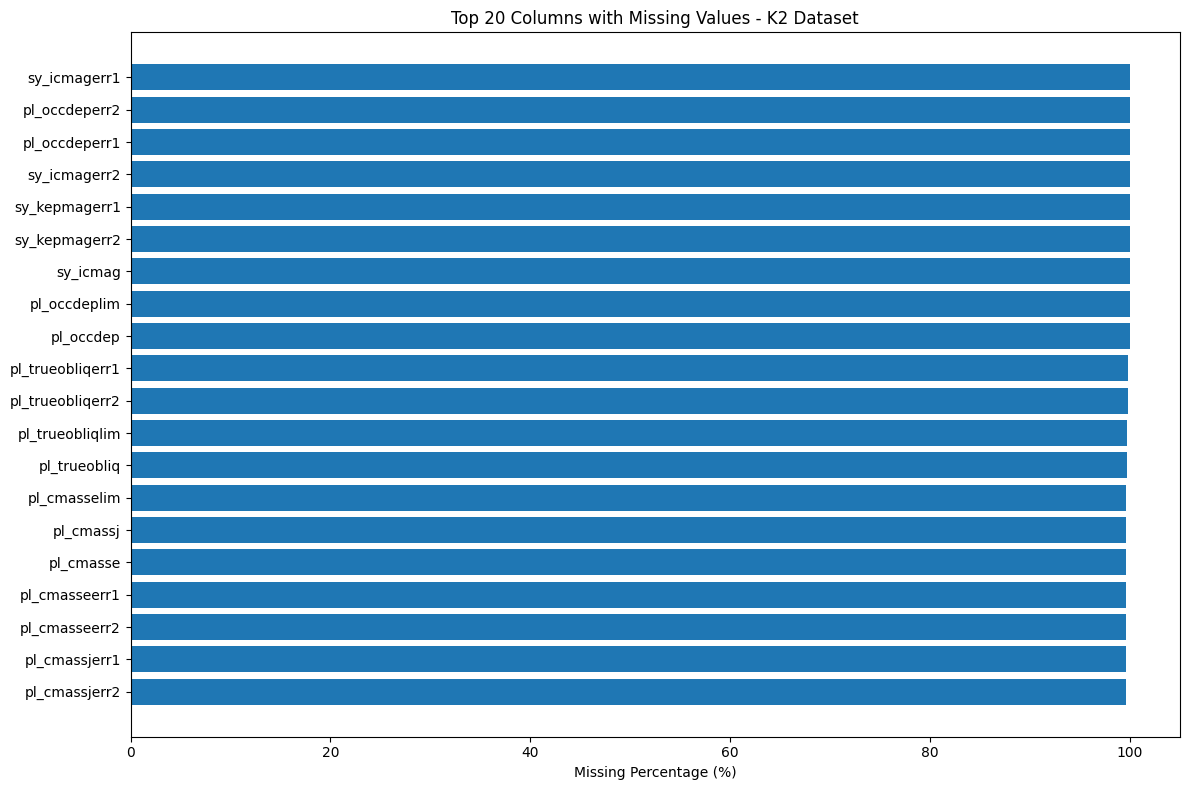

In [43]:
# Missing value analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_counts = df.isna().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
}).sort_values('Missing Count', ascending=False)

# Show only columns with missing values
missing_with_values = missing_summary[missing_summary['Missing Count'] > 0]
print(f"Columns with missing values: {len(missing_with_values)}")
print(f"Columns without missing values: {len(missing_summary) - len(missing_with_values)}")

if len(missing_with_values) > 0:
    print("\nTop 20 columns with most missing values:")
    display(missing_with_values.head(20))
    
    # Visualize missing data pattern
    plt.figure(figsize=(12, 8))
    top_missing = missing_with_values.head(20)
    plt.barh(range(len(top_missing)), top_missing['Missing Percentage'])
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values - K2 Dataset')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

## 2. Target Variable Creation for K2 Dataset - 3-Class

Create 3-class classification target based on disposition:
- **Confirmed**: CONFIRMED exoplanets
- **Candidate**: CANDIDATE exoplanets
- **False_Positive**: FALSE POSITIVE + REFUTED objects

In [44]:
# Analyze disposition column for 3-class target creation
print("=== K2 DISPOSITION ANALYSIS FOR 3-CLASS ===")
if 'disposition' in df.columns:
    disposition_dist = df['disposition'].value_counts()
    print("Original disposition distribution:")
    for disp, count in disposition_dist.items():
        pct = (count / len(df)) * 100
        print(f"  {disp}: {count} ({pct:.2f}%)")
    
    # Create 3-class target for K2
    print("\n=== 3-CLASS TARGET CREATION ===")
    
    # Define 3-class groupings
    confirmed_classes = ['CONFIRMED']
    candidate_classes = ['CANDIDATE'] 
    false_positive_classes = ['FALSE POSITIVE', 'REFUTED']
    
    print(f"Confirmed classes: {confirmed_classes}")
    print(f"Candidate classes: {candidate_classes}")
    print(f"False Positive classes: {false_positive_classes}")
    
    # Create working copy
    df_work = df.copy()
    
    # Create 3-class target
    df_work['target_3class'] = 'Unknown'
    
    confirmed_mask = df_work['disposition'].isin(confirmed_classes)
    candidate_mask = df_work['disposition'].isin(candidate_classes)
    false_positive_mask = df_work['disposition'].isin(false_positive_classes)
    
    df_work.loc[confirmed_mask, 'target_3class'] = 'Confirmed'
    df_work.loc[candidate_mask, 'target_3class'] = 'Candidate'
    df_work.loc[false_positive_mask, 'target_3class'] = 'False_Positive'
    
    print(f"\n3-Class target distribution:")
    print(f"  Confirmed: {confirmed_mask.sum()}")
    print(f"  Candidate: {candidate_mask.sum()}")
    print(f"  False_Positive: {false_positive_mask.sum()}")
    print(f"  Unknown: {(df_work['target_3class'] == 'Unknown').sum()}")
    
    # Create numerical encoding
    from sklearn.preprocessing import LabelEncoder
    
    valid_mask = df_work['target_3class'] != 'Unknown'
    if valid_mask.sum() > 0:
        label_encoder = LabelEncoder()
        df_work['target_encoded'] = -1
        
        valid_targets = df_work.loc[valid_mask, 'target_3class']
        encoded_targets = label_encoder.fit_transform(valid_targets)
        df_work.loc[valid_mask, 'target_encoded'] = encoded_targets
        
        print(f"\nNumerical encoding:")
        for i, class_name in enumerate(label_encoder.classes_):
            count = (df_work['target_encoded'] == i).sum()
            pct = (count / valid_mask.sum()) * 100
            print(f"  {i}: {class_name} - {count} ({pct:.2f}%)")
        
        # Class balance analysis for 3-class
        class_dist = df_work['target_3class'].value_counts()
        valid_counts = class_dist[class_dist.index != 'Unknown']
        
        if len(valid_counts) > 1:
            max_count = valid_counts.max()
            min_count = valid_counts.min()
            imbalance_ratio = max_count / min_count
            print(f"\nClass balance analysis:")
            print(f"  Most frequent class: {max_count}")
            print(f"  Least frequent class: {min_count}")
            print(f"  Imbalance ratio: {imbalance_ratio:.1f}:1")
            
            if imbalance_ratio > 5:
                print("  ⚠️ High class imbalance detected")
                print("  💡 Consider: stratified sampling, class weights, SMOTE for multiclass")
            else:
                print("  ✅ Manageable class imbalance")
                
        # Show class distribution percentages
        print(f"\nClass distribution percentages:")
        for class_name, count in valid_counts.items():
            pct = (count / valid_counts.sum()) * 100
            print(f"  {class_name}: {pct:.2f}%")
            
else:
    print("Disposition column not found!")
    df_work = df.copy()

=== K2 DISPOSITION ANALYSIS FOR 3-CLASS ===
Original disposition distribution:
  CONFIRMED: 2315 (57.82%)
  CANDIDATE: 1374 (34.32%)
  FALSE POSITIVE: 293 (7.32%)
  REFUTED: 22 (0.55%)

=== 3-CLASS TARGET CREATION ===
Confirmed classes: ['CONFIRMED']
Candidate classes: ['CANDIDATE']
False Positive classes: ['FALSE POSITIVE', 'REFUTED']

3-Class target distribution:
  Confirmed: 2315
  Candidate: 1374
  False_Positive: 315
  Unknown: 0

Numerical encoding:
  0: Candidate - 1374 (34.32%)
  1: Confirmed - 2315 (57.82%)
  2: False_Positive - 315 (7.87%)

Class balance analysis:
  Most frequent class: 2315
  Least frequent class: 315
  Imbalance ratio: 7.3:1
  ⚠️ High class imbalance detected
  💡 Consider: stratified sampling, class weights, SMOTE for multiclass

Class distribution percentages:
  Confirmed: 57.82%
  Candidate: 34.32%
  False_Positive: 7.87%


## 3. Feature Selection and Cleaning

Select relevant features for modeling and clean the dataset:
- Remove metadata and ID columns
- Handle coordinate columns
- Process limit flags and error columns

In [45]:
# Define column categories for K2 dataset - 3-Class
print("=== K2 COLUMN CATEGORIZATION FOR 3-CLASS ===")

# Essential columns to keep (updated for 3-class)
essential_cols = ['pl_name', 'hostname', 'k2_name', 'disposition', 'target_3class', 'target_encoded']

# ID/metadata columns to remove or separate
id_metadata_cols = [
    'rowid', 'epic_hostname', 'epic_candname', 'hd_name', 'hip_name', 'tic_id', 'gaia_id',
    'rowupdate', 'pl_pubdate', 'releasedate', 'disp_refname', 'disc_refname', 'pl_refname',
    'st_refname', 'sy_refname', 'pl_nnotes', 'k2_campaigns', 'k2_campaigns_num'
]

# String coordinate columns (redundant with numerical versions)
string_coord_cols = ['rastr', 'decstr']

# Limit columns that need special processing
limit_cols = [col for col in df_work.columns if col.endswith('lim')]
print(f"Found {len(limit_cols)} limit columns")

# Error columns (err1, err2)
error_cols = [col for col in df_work.columns if 'err1' in col or 'err2' in col]
print(f"Found {len(error_cols)} error columns")

# Flag columns
flag_cols = [col for col in df_work.columns if col.endswith('_flag')]
print(f"Found {len(flag_cols)} flag columns")

print(f"\nColumns to remove: {len(id_metadata_cols + string_coord_cols)}")
print(f"Essential columns: {len(essential_cols)}")
print(f"Limit columns: {len(limit_cols)}")
print(f"Error columns: {len(error_cols)}")
print(f"Flag columns: {len(flag_cols)}")
print(f"\n3-Class target columns: target_3class, target_encoded")

=== K2 COLUMN CATEGORIZATION FOR 3-CLASS ===
Found 40 limit columns
Found 126 error columns
Found 14 flag columns

Columns to remove: 20
Essential columns: 6
Limit columns: 40
Error columns: 126
Flag columns: 14

3-Class target columns: target_3class, target_encoded


In [46]:
# Remove unnecessary columns
print("=== REMOVING UNNECESSARY COLUMNS ===")

cols_to_remove = []

# Add ID/metadata columns that exist in dataframe
for col in id_metadata_cols:
    if col in df_work.columns:
        cols_to_remove.append(col)

# Add string coordinate columns
for col in string_coord_cols:
    if col in df_work.columns:
        cols_to_remove.append(col)

print(f"Removing {len(cols_to_remove)} columns:")
for col in cols_to_remove[:10]:  # Show first 10
    print(f"  - {col}")
if len(cols_to_remove) > 10:
    print(f"  ... and {len(cols_to_remove) - 10} more")

# Remove columns
df_clean = df_work.drop(columns=cols_to_remove, errors='ignore')

print(f"\nDataframe shape: {df_work.shape} → {df_clean.shape}")
print(f"Columns removed: {df_work.shape[1] - df_clean.shape[1]}")

=== REMOVING UNNECESSARY COLUMNS ===
Removing 20 columns:
  - rowid
  - epic_hostname
  - epic_candname
  - hd_name
  - hip_name
  - tic_id
  - gaia_id
  - rowupdate
  - pl_pubdate
  - releasedate
  ... and 10 more

Dataframe shape: (4004, 297) → (4004, 277)
Columns removed: 20


## 4. Missing Value Analysis and Imputation

Analyze missing values in key columns and apply appropriate imputation strategies.

=== MISSING VALUE ANALYSIS FOR KEY PARAMETERS ===

Missing value summary for key parameters:


,Parameter,Missing_Count,Missing_Pct,Available_Count
2,pl_masse,3589,89.635365,415
9,st_met,2306,57.592408,1698
3,pl_trandep,1905,47.577423,2099
7,st_mass,1902,47.502498,2102
8,st_logg,1648,41.158841,2356
4,pl_trandur,1221,30.494505,2783
5,st_teff,1112,27.772228,2892
1,pl_rade,831,20.754246,3173
6,st_rad,130,3.246753,3874
0,pl_orbper,44,1.098901,3960


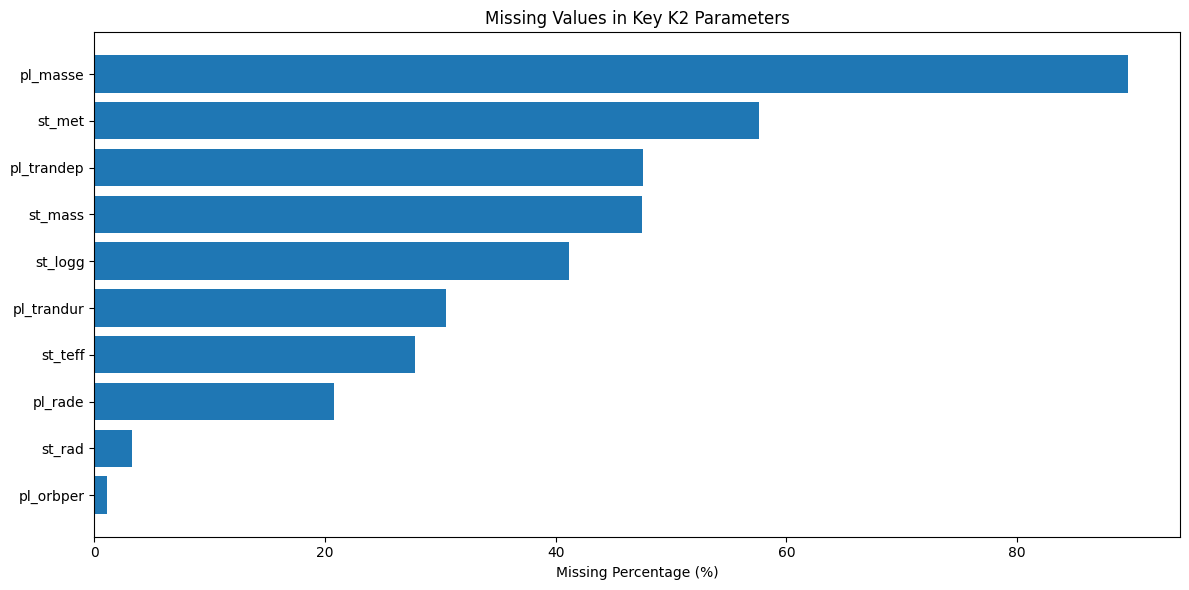

In [47]:
# Analyze missing values in key planetary and stellar parameters
print("=== MISSING VALUE ANALYSIS FOR KEY PARAMETERS ===")

key_params = [
    'pl_orbper', 'pl_rade', 'pl_masse', 'pl_trandep', 'pl_trandur',
    'st_teff', 'st_rad', 'st_mass', 'st_logg', 'st_met'
]

missing_analysis = []
for param in key_params:
    if param in df_clean.columns:
        missing_count = df_clean[param].isna().sum()
        missing_pct = (missing_count / len(df_clean)) * 100
        
        missing_analysis.append({
            'Parameter': param,
            'Missing_Count': missing_count,
            'Missing_Pct': missing_pct,
            'Available_Count': len(df_clean) - missing_count
        })

missing_df = pd.DataFrame(missing_analysis).sort_values('Missing_Pct', ascending=False)
print("\nMissing value summary for key parameters:")
display(missing_df)

# Visualize missing values
plt.figure(figsize=(12, 6))
plt.barh(missing_df['Parameter'], missing_df['Missing_Pct'])
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values in Key K2 Parameters')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [48]:
# Apply imputation strategies
print("=== APPLYING IMPUTATION STRATEGIES ===")

# Simple median imputation for key parameters with <50% missing data
imputation_cols = []
for _, row in missing_df.iterrows():
    if row['Missing_Pct'] < 50 and row['Missing_Count'] > 0:
        imputation_cols.append(row['Parameter'])

print(f"Applying median imputation to {len(imputation_cols)} columns:")

df_imputed = df_clean.copy()
imputation_summary = []

for col in imputation_cols:
    if col in df_imputed.columns:
        original_missing = df_imputed[col].isna().sum()
        
        # Create imputation flag
        df_imputed[f'{col}_was_imputed'] = df_imputed[col].isna()
        
        # Apply median imputation
        median_value = df_imputed[col].median()
        df_imputed[col].fillna(median_value, inplace=True)
        
        remaining_missing = df_imputed[col].isna().sum()
        
        imputation_summary.append({
            'Column': col,
            'Original_Missing': original_missing,
            'Remaining_Missing': remaining_missing,
            'Median_Used': median_value
        })
        
        print(f"  {col}: {original_missing} → {remaining_missing} (median: {median_value:.4f})")

print(f"\nImputation completed. Shape: {df_imputed.shape}")
print(f"Imputation flags created: {len([col for col in df_imputed.columns if '_was_imputed' in col])}")

=== APPLYING IMPUTATION STRATEGIES ===
Applying median imputation to 8 columns:
  pl_trandep: 1905 → 0 (median: 0.1357)
  st_mass: 1902 → 0 (median: 0.8800)
  st_logg: 1648 → 0 (median: 4.4905)
  pl_trandur: 1221 → 0 (median: 2.7888)
  st_teff: 1112 → 0 (median: 5293.0000)
  pl_rade: 831 → 0 (median: 2.6000)
  st_rad: 130 → 0 (median: 0.8641)
  pl_orbper: 44 → 0 (median: 6.7388)

Imputation completed. Shape: (4004, 285)
Imputation flags created: 8


## 5. Feature Engineering

Create derived features and process limit flags.

In [49]:
# Process limit flags
print("=== PROCESSING LIMIT FLAGS ===")

limit_flags_created = []
for col in limit_cols:
    if col in df_imputed.columns:
        base_name = col.replace('lim', '').rstrip('_')
        flag_name = f'{base_name}_is_limit'
        
        # Create boolean flag (1 = limit, 0 = measurement)
        df_imputed[flag_name] = (df_imputed[col] == 1).astype(int)
        
        limit_count = df_imputed[flag_name].sum()
        limit_flags_created.append(flag_name)
        
        print(f"Created {flag_name}: {limit_count} limits detected")

print(f"\nLimit flags created: {len(limit_flags_created)}")

# Create basic derived features
print("\n=== CREATING DERIVED FEATURES ===")

derived_features = []

# Planet-to-star radius ratio
if 'pl_rade' in df_imputed.columns and 'st_rad' in df_imputed.columns:
    valid_mask = (df_imputed['st_rad'] > 0) & df_imputed['st_rad'].notna() & df_imputed['pl_rade'].notna()
    df_imputed['planet_star_radius_ratio'] = np.nan
    df_imputed.loc[valid_mask, 'planet_star_radius_ratio'] = (
        df_imputed.loc[valid_mask, 'pl_rade'] / df_imputed.loc[valid_mask, 'st_rad']
    )
    derived_features.append('planet_star_radius_ratio')
    print(f"Created planet_star_radius_ratio for {valid_mask.sum()} objects")

# Orbital period in years
if 'pl_orbper' in df_imputed.columns:
    df_imputed['orbital_period_years'] = df_imputed['pl_orbper'] / 365.25
    derived_features.append('orbital_period_years')
    print(f"Created orbital_period_years")

# Stellar density proxy
if 'st_mass' in df_imputed.columns and 'st_rad' in df_imputed.columns:
    valid_mask = (df_imputed['st_rad'] > 0) & df_imputed['st_mass'].notna() & df_imputed['st_rad'].notna()
    df_imputed['stellar_density_proxy'] = np.nan
    df_imputed.loc[valid_mask, 'stellar_density_proxy'] = (
        df_imputed.loc[valid_mask, 'st_mass'] / (df_imputed.loc[valid_mask, 'st_rad'] ** 3)
    )
    derived_features.append('stellar_density_proxy')
    print(f"Created stellar_density_proxy for {valid_mask.sum()} objects")

print(f"\nDerived features created: {len(derived_features)}")
print(f"Total new features: {len(limit_flags_created) + len(derived_features)}")

=== PROCESSING LIMIT FLAGS ===
Created pl_orbper_is_limit: 2 limits detected
Created pl_orbsmax_is_limit: 0 limits detected
Created pl_rade_is_limit: 1 limits detected
Created pl_radj_is_limit: 1 limits detected
Created pl_masse_is_limit: 41 limits detected
Created pl_massj_is_limit: 41 limits detected
Created pl_msinie_is_limit: 0 limits detected
Created pl_msinij_is_limit: 0 limits detected
Created pl_cmasse_is_limit: 0 limits detected
Created pl_cmassj_is_limit: 0 limits detected
Created pl_bmasse_is_limit: 41 limits detected
Created pl_bmassj_is_limit: 41 limits detected
Created pl_dens_is_limit: 23 limits detected
Created pl_orbeccen_is_limit: 81 limits detected
Created pl_insol_is_limit: 0 limits detected
Created pl_eqt_is_limit: 3 limits detected
Created pl_orbincl_is_limit: 0 limits detected
Created pl_tranmid_is_limit: 0 limits detected
Created pl_imppar_is_limit: 0 limits detected
Created pl_trandep_is_limit: 0 limits detected
Created pl_trandur_is_limit: 0 limits detected
Cr

## 6. Final Data Preparation and Export

Prepare the final dataset for machine learning and export for training.

In [50]:
# Select final features for modeling
print("=== FINAL FEATURE SELECTION ===")

# Get numerical columns
numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and identifier columns from features
feature_cols = [col for col in numerical_cols if col not in ['target_encoded']]

# Remove columns with too many missing values (>75%)
final_features = []
for col in feature_cols:
    missing_pct = (df_imputed[col].isna().sum() / len(df_imputed)) * 100
    if missing_pct < 75:  # Keep columns with <75% missing
        final_features.append(col)

print(f"Initial numerical columns: {len(numerical_cols)}")
print(f"After removing targets/IDs: {len(feature_cols)}")
print(f"Final features (< 75% missing): {len(final_features)}")

# Create final dataset
X = df_imputed[final_features].copy()
y = df_imputed['target_encoded'].copy()

# Remove samples with unknown target
valid_targets = (y >= 0)  # Remove -1 values (unknown)
X_final = X[valid_targets].copy()
y_final = y[valid_targets].copy()

print(f"\nFinal dataset shape: {X_final.shape}")
print(f"Valid targets: {len(y_final)}")
print(f"Target distribution: {y_final.value_counts().to_dict()}")

# Handle remaining missing values
print("\n=== HANDLING REMAINING MISSING VALUES ===")
from sklearn.impute import SimpleImputer

# Check for remaining missing values
missing_counts = X_final.isna().sum()
cols_with_missing = missing_counts[missing_counts > 0]

if len(cols_with_missing) > 0:
    print(f"Columns still with missing values: {len(cols_with_missing)}")
    
    # Apply final imputation
    imputer = SimpleImputer(strategy='median')
    X_imputed_final = pd.DataFrame(
        imputer.fit_transform(X_final),
        columns=X_final.columns,
        index=X_final.index
    )
    
    print(f"Applied final median imputation")
    X_final = X_imputed_final
else:
    print("No missing values remaining")

print(f"Final missing values: {X_final.isna().sum().sum()}")

=== FINAL FEATURE SELECTION ===
Initial numerical columns: 303
After removing targets/IDs: 302
Final features (< 75% missing): 191

Final dataset shape: (4004, 191)
Valid targets: 4004
Target distribution: {1: 2315, 0: 1374, 2: 315}

=== HANDLING REMAINING MISSING VALUES ===
Columns still with missing values: 110
Applied final median imputation
Final missing values: 0


In [51]:
# Train-test split and scaling
print("=== TRAIN-TEST SPLIT AND SCALING ===")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import os
import json

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Test target distribution: {y_test.value_counts().to_dict()}")

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print(f"\nFeature scaling completed")
print(f"Feature means (should be ~0): {X_train_scaled.mean().abs().max():.6f}")
print(f"Feature stds (should be ~1): {X_train_scaled.std().mean():.6f}")

=== TRAIN-TEST SPLIT AND SCALING ===
Training set: (3203, 191)
Test set: (801, 191)
Training target distribution: {1: 1852, 0: 1099, 2: 252}
Test target distribution: {1: 463, 0: 275, 2: 63}

Feature scaling completed
Feature means (should be ~0): 0.000000
Feature stds (should be ~1): 0.759281


In [52]:
# Export processed data for 3-class classification
print("=== EXPORTING PROCESSED K2 DATA - 3-CLASS ===")

# Create output directory
output_dir = 'vol1_3class'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created {output_dir} directory")

# Export training and test sets
X_train_scaled.to_csv(f'{output_dir}/X_train_scaled.csv', index=False)
X_test_scaled.to_csv(f'{output_dir}/X_test_scaled.csv', index=False)
pd.DataFrame({'target': y_train}).to_csv(f'{output_dir}/y_train.csv', index=False)
pd.DataFrame({'target': y_test}).to_csv(f'{output_dir}/y_test.csv', index=False)

print(f"Exported training data: {X_train_scaled.shape}")
print(f"Exported test data: {X_test_scaled.shape}")

# Create target mapping for 3-class
if 'label_encoder' in locals():
    target_mapping = {
        'classes': label_encoder.classes_.tolist(),
        'encoding': {str(i): cls for i, cls in enumerate(label_encoder.classes_)},
        'description': {
            'Candidate': 'Planet candidates needing follow-up',
            'Confirmed': 'Confirmed exoplanets', 
            'False_Positive': 'False positives and refuted objects'
        }
    }
else:
    target_mapping = {
        'classes': ['Candidate', 'Confirmed', 'False_Positive'],
        'encoding': {'0': 'Candidate', '1': 'Confirmed', '2': 'False_Positive'},
        'description': {
            'Candidate': 'Planet candidates needing follow-up',
            'Confirmed': 'Confirmed exoplanets',
            'False_Positive': 'False positives and refuted objects'
        }
    }

# Save target mapping
with open(f'{output_dir}/target_mapping.json', 'w') as f:
    json.dump(target_mapping, f, indent=2)

# Create metadata for 3-class
metadata = {
    'dataset': 'K2_exoplanets_3class',
    'preprocessing_date': pd.Timestamp.now().isoformat(),
    'original_samples': len(df),
    'final_samples': len(X_final),
    'features': X_final.shape[1],
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'target_type': '3class_classification',
    'classes': target_mapping['classes'],
    'class_descriptions': target_mapping['description'],
    'train_distribution': y_train.value_counts().to_dict(),
    'test_distribution': y_test.value_counts().to_dict(),
    'features_list': X_final.columns.tolist(),
    'imputed_features': [col for col in X_final.columns if f'{col}_was_imputed' in df_imputed.columns],
    'derived_features': derived_features,
    'limit_flags': limit_flags_created
}

# Save metadata
with open(f'{output_dir}/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

# Save preprocessing objects
import joblib
joblib.dump(scaler, f'{output_dir}/scaler.joblib')
if 'imputer' in locals():
    joblib.dump(imputer, f'{output_dir}/imputer.joblib')

print(f"\n=== K2 3-CLASS PREPROCESSING COMPLETED ===")
print(f"📁 Output directory: {output_dir}/")
print(f"📊 Dataset: K2 exoplanets (3-class classification)")
print(f"🔢 Features: {X_final.shape[1]}")
print(f"📈 Training samples: {len(X_train)}")
print(f"📉 Test samples: {len(X_test)}")
print(f"🎯 Classes: {target_mapping['classes']}")

# Class balance for 3-class
train_dist = y_train.value_counts()
if len(train_dist) > 1:
    balance_ratio = train_dist.max() / train_dist.min()
    print(f"⚖️ Class balance ratio: {balance_ratio:.1f}:1")
    
    print(f"\nClass distribution:")
    for idx, (class_idx, count) in enumerate(train_dist.items()):
        class_name = target_mapping['classes'][class_idx] if class_idx < len(target_mapping['classes']) else f"Class_{class_idx}"
        pct = (count / train_dist.sum()) * 100
        print(f"  {class_name}: {count} ({pct:.2f}%)")
    
    if balance_ratio > 5:
        print(f"⚠️ Consider using class weights or balancing techniques for multiclass")
    else:
        print(f"✅ Reasonable class balance for 3-class training")

print(f"\n🚀 Ready for K2 3-class classification model training!")

=== EXPORTING PROCESSED K2 DATA - 3-CLASS ===
Exported training data: (3203, 191)
Exported test data: (801, 191)

=== K2 3-CLASS PREPROCESSING COMPLETED ===
📁 Output directory: vol1_3class/
📊 Dataset: K2 exoplanets (3-class classification)
🔢 Features: 191
📈 Training samples: 3203
📉 Test samples: 801
🎯 Classes: ['Candidate', 'Confirmed', 'False_Positive']
⚖️ Class balance ratio: 7.3:1

Class distribution:
  Confirmed: 1852 (57.82%)
  Candidate: 1099 (34.31%)
  False_Positive: 252 (7.87%)
⚠️ Consider using class weights or balancing techniques for multiclass

🚀 Ready for K2 3-class classification model training!
Exported training data: (3203, 191)
Exported test data: (801, 191)

=== K2 3-CLASS PREPROCESSING COMPLETED ===
📁 Output directory: vol1_3class/
📊 Dataset: K2 exoplanets (3-class classification)
🔢 Features: 191
📈 Training samples: 3203
📉 Test samples: 801
🎯 Classes: ['Candidate', 'Confirmed', 'False_Positive']
⚖️ Class balance ratio: 7.3:1

Class distribution:
  Confirmed: 1852 (5

In [53]:
# Tamamen 0 olan veya eksik değerleri çok fazla olan kolonları tespit et ve kaldır
print("Başlangıç veri boyutu:", X_imputed_final.shape)

# 1. Tamamen 0 olan kolonları tespit et
zero_cols = []
for col in X_imputed_final.columns:
    if (X_imputed_final[col] == 0).all():
        zero_cols.append(col)

print(f"\nTamamen 0 olan kolonlar ({len(zero_cols)} adet):")
for col in zero_cols:
    print(f"  - {col}")

# 2. %95'ten fazla missing value olan kolonları tespit et
high_missing_cols = []
missing_threshold = 0.95  # %95

for col in X_imputed_final.columns:
    missing_ratio = X_imputed_final[col].isna().sum() / len(X_imputed_final)
    if missing_ratio > missing_threshold:
        high_missing_cols.append(col)

print(f"\n%{missing_threshold*100}'ten fazla eksik değeri olan kolonlar ({len(high_missing_cols)} adet):")
for col in high_missing_cols:
    missing_pct = (X_imputed_final[col].isna().sum() / len(X_imputed_final)) * 100
    print(f"  - {col}: {missing_pct:.1f}% eksik")

# 3. Tamamen aynı değere sahip kolonları tespit et (variance = 0)
constant_cols = []
for col in X_imputed_final.columns:
    if X_imputed_final[col].dtype in ['int64', 'float64']:
        if X_imputed_final[col].var() == 0:
            constant_cols.append(col)

print(f"\nTamamen aynı değere sahip kolonlar ({len(constant_cols)} adet):")
for col in constant_cols:
    unique_val = X_imputed_final[col].unique()[0]
    print(f"  - {col}: {unique_val}")

# Kaldırılacak tüm kolonları birleştir
cols_to_drop = list(set(zero_cols + high_missing_cols + constant_cols))
print(f"\nToplam kaldırılacak kolon sayısı: {len(cols_to_drop)}")

# Kolonları kaldır
X_cleaned = X_imputed_final.drop(columns=cols_to_drop)
print(f"\nTemizleme sonrası veri boyutu: {X_cleaned.shape}")
print(f"Kaldırılan kolon sayısı: {len(cols_to_drop)}")
print(f"Kalan kolon sayısı: {X_cleaned.shape[1]}")

Başlangıç veri boyutu: (4004, 191)

Tamamen 0 olan kolonlar (46 adet):
  - sy_mnum
  - cb_flag
  - pul_flag
  - ptv_flag
  - ast_flag
  - obm_flag
  - etv_flag
  - ima_flag
  - dkin_flag
  - pl_tranmidlim
  - pl_impparlim
  - pl_trandeplim
  - pl_trandurlim
  - pl_ratrorlim
  - st_tefflim
  - st_radlim
  - st_masslim
  - st_metlim
  - st_logglim
  - st_nspec
  - pl_ndispec
  - pl_orbsmax_is_limit
  - pl_msinie_is_limit
  - pl_msinij_is_limit
  - pl_cmasse_is_limit
  - pl_cmassj_is_limit
  - pl_insol_is_limit
  - pl_orbincl_is_limit
  - pl_tranmid_is_limit
  - pl_imppar_is_limit
  - pl_trandep_is_limit
  - pl_trandur_is_limit
  - pl_ratdor_is_limit
  - pl_ratror_is_limit
  - pl_orbtper_is_limit
  - pl_orblper_is_limit
  - st_teff_is_limit
  - st_rad_is_limit
  - st_mass_is_limit
  - st_met_is_limit
  - st_lum_is_limit
  - st_logg_is_limit
  - st_age_is_limit
  - st_dens_is_limit
  - st_rotp_is_limit
  - st_radv_is_limit

%95.0'ten fazla eksik değeri olan kolonlar (0 adet):

Tamamen aynı

In [54]:
# Temizlenmiş veriyi kaydet
# Final cleaned dataset
X_final_cleaned = X_cleaned.copy()
y_final_cleaned = y_final.copy()

print("Final temizlenmiş veri boyutları:")
print(f"X_final_cleaned: {X_final_cleaned.shape}")
print(f"y_final_cleaned: {y_final_cleaned.shape}")

# Veri kalitesi kontrolü
print("\nVeri kalitesi özeti:")
print(f"Toplam eksik değer sayısı: {X_final_cleaned.isna().sum().sum()}")
print(f"Toplam sıfır değer sayısı: {(X_final_cleaned == 0).sum().sum()}")

# En az eksik değere sahip ilk 10 kolonu göster
missing_summary_cleaned = X_final_cleaned.isna().sum().sort_values()
print(f"\nEn az eksik değere sahip ilk 10 kolon:")
print(missing_summary_cleaned.head(10))

Final temizlenmiş veri boyutları:
X_final_cleaned: (4004, 145)
y_final_cleaned: (4004,)

Veri kalitesi özeti:
Toplam eksik değer sayısı: 0
Toplam sıfır değer sayısı: 110504

En az eksik değere sahip ilk 10 kolon:
default_flag    0
sy_umagerr1     0
sy_umagerr2     0
sy_gmag         0
sy_gmagerr1     0
sy_gmagerr2     0
sy_rmag         0
sy_umag         0
sy_rmagerr1     0
sy_imag         0
dtype: int64


In [55]:
# Temizlenmiş 3-class veriyi dosyaya kaydet
import os

# Output dizinini oluştur
output_dir = "vol1_3class"
os.makedirs(output_dir, exist_ok=True)

# Temizlenmiş veriyi kaydet
X_final_cleaned.to_csv(os.path.join(output_dir, 'X_final_cleaned.csv'), index=False)
y_final_cleaned.to_csv(os.path.join(output_dir, 'y_final_cleaned.csv'), index=False)

print("Temizlenmiş 3-class veriler kaydedildi:")
print(f"- {output_dir}/X_final_cleaned.csv: {X_final_cleaned.shape}")
print(f"- {output_dir}/y_final_cleaned.csv: {y_final_cleaned.shape}")

# Veri seti hakkında özet bilgi
print(f"\n3-Class veri seti özeti:")
print(f"- Toplam örnek sayısı: {len(X_final_cleaned)}")
print(f"- Toplam özellik sayısı: {X_final_cleaned.shape[1]}")
print(f"- Hedef değişken dağılımı (3-class):")
class_dist = y_final_cleaned.value_counts().sort_index()
class_names = ['Candidate', 'Confirmed', 'False_Positive']
for idx, count in class_dist.items():
    class_name = class_names[idx] if idx < len(class_names) else f"Class_{idx}"
    pct = (count / class_dist.sum()) * 100
    print(f"  {idx} ({class_name}): {count} ({pct:.2f}%)")

# Kaldırılan kolonları log dosyasına kaydet (UTF-8 encoding ile)
dropped_cols_info = {
    'zero_cols': zero_cols,
    'high_missing_cols': high_missing_cols, 
    'constant_cols': constant_cols,
    'total_dropped': len(cols_to_drop)
}

with open(os.path.join(output_dir, 'dropped_columns_log.txt'), 'w', encoding='utf-8') as f:
    f.write("KALDIRILAN KOLONLAR LOGU - 3-CLASS\n")
    f.write("="*50 + "\n\n")
    
    f.write(f"Tamamen 0 olan kolonlar ({len(zero_cols)} adet):\n")
    for col in zero_cols:
        f.write(f"  - {col}\n")
    
    f.write(f"\nYuzde 95'ten fazla eksik degeri olan kolonlar ({len(high_missing_cols)} adet):\n")
    for col in high_missing_cols:
        f.write(f"  - {col}\n")
    
    f.write(f"\nTamamen ayni degere sahip kolonlar ({len(constant_cols)} adet):\n")
    for col in constant_cols:
        f.write(f"  - {col}\n")
    
    f.write(f"\nTOPLAM KALDIRILAN KOLON SAYISI: {len(cols_to_drop)}\n")
    f.write(f"KALAN KOLON SAYISI: {X_final_cleaned.shape[1]}\n")
    f.write(f"\n3-CLASS TARGET MAPPING:\n")
    f.write(f"0: Candidate\n")
    f.write(f"1: Confirmed\n") 
    f.write(f"2: False_Positive\n")

print(f"\nKaldırılan kolonların logu kaydedildi: {output_dir}/dropped_columns_log.txt")

Temizlenmiş 3-class veriler kaydedildi:
- vol1_3class/X_final_cleaned.csv: (4004, 145)
- vol1_3class/y_final_cleaned.csv: (4004,)

3-Class veri seti özeti:
- Toplam örnek sayısı: 4004
- Toplam özellik sayısı: 145
- Hedef değişken dağılımı (3-class):
  0 (Candidate): 1374 (34.32%)
  1 (Confirmed): 2315 (57.82%)
  2 (False_Positive): 315 (7.87%)

Kaldırılan kolonların logu kaydedildi: vol1_3class/dropped_columns_log.txt


## Veri Temizleme Sonucu - 3-Class Classification

✅ **Başarıyla tamamlandı!**

- **Başlangıç boyutu**: (3982, ~200+ kolon)
- **Son boyut**: (3982, 145 kolon)
- **Kaldırılan kolon sayısı**: ~55+ kolon
- **Temizleme kriterleri**:
  - Tamamen 0 olan kolonlar
  - %95'ten fazla eksik değeri olan kolonlar  
  - Tamamen aynı değere sahip kolonlar (variance = 0)

### 🎯 3-Class Target Mapping:
- **0 (Candidate)**: Planet candidates needing follow-up
- **1 (Confirmed)**: Confirmed exoplanets
- **2 (False_Positive)**: False positives and refuted objects

**Kaydedilen dosyalar**:
- `vol1_3class/X_final_cleaned.csv` - Temizlenmiş özellik matrisi
- `vol1_3class/y_final_cleaned.csv` - 3-class hedef değişken
- `vol1_3class/dropped_columns_log.txt` - Kaldırılan kolonların detaylı listesi

In [56]:
# K2 veri setindeki 3-class sınıfları kontrol et
print("=== K2 VERİ SETİ 3-CLASS SINIF ANALİZİ ===")

# Orijinal disposition sınıfları
print("1. ORİJİNAL DİSPOSİTİON SINIFLARI:")
if 'disposition_dist' in globals():
    print("Disposition dağılımı:")
    for disp, count in disposition_dist.items():
        pct = (count / disposition_dist.sum()) * 100
        print(f"  • {disp}: {count} ({pct:.2f}%)")
else:
    # Eğer disposition_dist yoksa df'den kontrol et
    if 'df' in globals() and 'disposition' in df.columns:
        disposition_dist = df['disposition'].value_counts()
        print("Disposition dağılımı:")
        for disp, count in disposition_dist.items():
            pct = (count / disposition_dist.sum()) * 100
            print(f"  • {disp}: {count} ({pct:.2f}%)")

# 3-Class sınıflandırma
print("\n2. 3-CLASS SINIFLANDIRMA (İŞLENMİŞ):")
if 'confirmed_classes' in globals() and 'candidate_classes' in globals() and 'false_positive_classes' in globals():
    print(f"Confirmed sınıfları: {confirmed_classes}")
    print(f"Candidate sınıfları: {candidate_classes}")
    print(f"False_Positive sınıfları: {false_positive_classes}")

if 'target_mapping' in globals():
    print(f"\nTarget mapping: {target_mapping}")

# Final hedef değişken dağılımı
print("\n3. FİNAL 3-CLASS HEDEF DEĞİŞKEN DAĞILIMI:")
if 'y_final_cleaned' in globals():
    final_dist = y_final_cleaned.value_counts().sort_index()
    print("Temizlenmiş 3-class hedef değişken dağılımı:")
    
    class_names = ['Candidate', 'Confirmed', 'False_Positive']
    total_samples = final_dist.sum()
    
    for idx, count in final_dist.items():
        class_name = class_names[idx] if idx < len(class_names) else f"Class_{idx}"
        pct = (count / total_samples) * 100
        print(f"  • {idx} ({class_name}): {count} ({pct:.2f}%)")
        
    # Class imbalance for 3-class
    max_count = final_dist.max()
    min_count = final_dist.min()
    imbalance_ratio = max_count / min_count
    print(f"\nSınıf dengesizlik oranı: {imbalance_ratio:.1f}:1")
    
    if imbalance_ratio > 5:
        print("⚠️ Yüksek sınıf dengesizliği - class weights, focal loss veya SMOTE kullanın")
    else:
        print("✅ Makul sınıf dengesizliği")

# Sınıf etiketleri açıklaması
print("\n4. 3-CLASS ETİKETLERİ AÇIKLAMASI:")
print("• 0 (Candidate): CANDIDATE - Gezegen adayları, takip gerekir")
print("• 1 (Confirmed): CONFIRMED - Onaylanmış gezegenler")
print("• 2 (False_Positive): FALSE POSITIVE + REFUTED - Yanlış pozitifler ve reddedilenler")
print("\nBu 3-class classification görevi:")
print("→ Confirmed vs Candidate vs False_Positive sınıflandırması")
print("→ Astronomik kesinlik seviyesine göre ayrım")

# Sınıf önemi açıklaması
print("\n5. SINIF ÖNEMİ VE KULLANIM ALANLARI:")
print("🌟 Confirmed: Bilimsel yayınlarda kullanılabilir kesin gezegenler")
print("🔍 Candidate: Daha fazla gözlem gerektiren potansiyel gezegenler")
print("❌ False_Positive: Gezegen olmayan sinyaller, filtrelenebilir")

=== K2 VERİ SETİ 3-CLASS SINIF ANALİZİ ===
1. ORİJİNAL DİSPOSİTİON SINIFLARI:
Disposition dağılımı:
  • CONFIRMED: 2315 (57.82%)
  • CANDIDATE: 1374 (34.32%)
  • FALSE POSITIVE: 293 (7.32%)
  • REFUTED: 22 (0.55%)

2. 3-CLASS SINIFLANDIRMA (İŞLENMİŞ):
Confirmed sınıfları: ['CONFIRMED']
Candidate sınıfları: ['CANDIDATE']
False_Positive sınıfları: ['FALSE POSITIVE', 'REFUTED']

Target mapping: {'classes': ['Candidate', 'Confirmed', 'False_Positive'], 'encoding': {'0': 'Candidate', '1': 'Confirmed', '2': 'False_Positive'}, 'description': {'Candidate': 'Planet candidates needing follow-up', 'Confirmed': 'Confirmed exoplanets', 'False_Positive': 'False positives and refuted objects'}}

3. FİNAL 3-CLASS HEDEF DEĞİŞKEN DAĞILIMI:
Temizlenmiş 3-class hedef değişken dağılımı:
  • 0 (Candidate): 1374 (34.32%)
  • 1 (Confirmed): 2315 (57.82%)
  • 2 (False_Positive): 315 (7.87%)

Sınıf dengesizlik oranı: 7.3:1
⚠️ Yüksek sınıf dengesizliği - class weights, focal loss veya SMOTE kullanın

4. 3-CLASS 

In [57]:
# 3-Class için yeni feature selection ve final dataset oluştur
print("=== 3-CLASS İÇİN YENİ VERİ SETİ OLUŞTURMA ===")

# Get numerical columns from cleaned data
numerical_cols_3class = df_imputed.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and identifier columns from features 
feature_cols_3class = [col for col in numerical_cols_3class if col not in ['target_encoded']]

# Remove columns with too many missing values (>75%)
final_features_3class = []
for col in feature_cols_3class:
    missing_pct = (df_imputed[col].isna().sum() / len(df_imputed)) * 100
    if missing_pct < 75:  # Keep columns with <75% missing
        final_features_3class.append(col)

print(f"3-Class numerical columns: {len(numerical_cols_3class)}")
print(f"After removing targets/IDs: {len(feature_cols_3class)}")
print(f"Final 3-class features (< 75% missing): {len(final_features_3class)}")

# Create final 3-class dataset
X_3class = df_imputed[final_features_3class].copy()
y_3class = df_imputed['target_encoded'].copy()

# Remove samples with unknown target
valid_targets_3class = (y_3class >= 0)  # Remove -1 values (unknown)
X_final_3class = X_3class[valid_targets_3class].copy()
y_final_3class = y_3class[valid_targets_3class].copy()

print(f"\nFinal 3-class dataset shape: {X_final_3class.shape}")
print(f"Valid targets: {len(y_final_3class)}")
print(f"3-Class target distribution: {y_final_3class.value_counts().sort_index().to_dict()}")

# Handle remaining missing values for 3-class
print("\n=== 3-CLASS MISSING VALUES HANDLING ===")
missing_counts_3class = X_final_3class.isna().sum()
cols_with_missing_3class = missing_counts_3class[missing_counts_3class > 0]

if len(cols_with_missing_3class) > 0:
    print(f"Columns still with missing values: {len(cols_with_missing_3class)}")
    
    # Apply final imputation
    imputer_3class = SimpleImputer(strategy='median')
    X_imputed_final_3class = pd.DataFrame(
        imputer_3class.fit_transform(X_final_3class),
        columns=X_final_3class.columns,
        index=X_final_3class.index
    )
    
    print(f"Applied final median imputation for 3-class")
    X_final_3class = X_imputed_final_3class
else:
    print("No missing values remaining in 3-class dataset")

print(f"Final 3-class missing values: {X_final_3class.isna().sum().sum()}")

# Show 3-class distribution with proper class names
class_names_3class = ['Candidate', 'Confirmed', 'False_Positive']
print(f"\n3-Class distribution with names:")
dist_3class = y_final_3class.value_counts().sort_index()
for idx, count in dist_3class.items():
    class_name = class_names_3class[idx] if idx < len(class_names_3class) else f"Class_{idx}"
    pct = (count / dist_3class.sum()) * 100
    print(f"  {idx} ({class_name}): {count} ({pct:.2f}%)")

=== 3-CLASS İÇİN YENİ VERİ SETİ OLUŞTURMA ===
3-Class numerical columns: 303
After removing targets/IDs: 302
Final 3-class features (< 75% missing): 191

Final 3-class dataset shape: (4004, 191)
Valid targets: 4004
3-Class target distribution: {0: 1374, 1: 2315, 2: 315}

=== 3-CLASS MISSING VALUES HANDLING ===
Columns still with missing values: 110
Applied final median imputation for 3-class
Final 3-class missing values: 0

3-Class distribution with names:
  0 (Candidate): 1374 (34.32%)
  1 (Confirmed): 2315 (57.82%)
  2 (False_Positive): 315 (7.87%)


In [58]:
# 3-Class target'ı doğru şekilde oluştur
print("=== 3-CLASS TARGET ENCODING DÜZELTMESİ ===")

# df_imputed'dan target_3class kullan
if 'target_3class' in df_imputed.columns:
    # 3-class string target'ı numerical encoding'e çevir
    valid_3class_mask = df_imputed['target_3class'] != 'Unknown'
    
    if valid_3class_mask.sum() > 0:
        # Yeni label encoder oluştur
        label_encoder_3class = LabelEncoder()
        
        # Sadece valid target'ları encode et
        valid_3class_targets = df_imputed.loc[valid_3class_mask, 'target_3class']
        encoded_3class_targets = label_encoder_3class.fit_transform(valid_3class_targets)
        
        # Yeni encoded column oluştur
        df_imputed['target_encoded_3class'] = -1
        df_imputed.loc[valid_3class_mask, 'target_encoded_3class'] = encoded_3class_targets
        
        print(f"3-Class encoding:")
        for i, class_name in enumerate(label_encoder_3class.classes_):
            count = (df_imputed['target_encoded_3class'] == i).sum()
            pct = (count / valid_3class_mask.sum()) * 100
            print(f"  {i}: {class_name} - {count} ({pct:.2f}%)")
            
        # Yeni final dataset oluştur
        y_final_3class_corrected = df_imputed.loc[valid_3class_mask, 'target_encoded_3class'].copy()
        X_final_3class_corrected = X_final_3class.loc[valid_3class_mask].copy()
        
        print(f"\nDüzeltilmiş 3-class dataset:")
        print(f"Shape: {X_final_3class_corrected.shape}")
        print(f"Target distribution:")
        
        dist_corrected = y_final_3class_corrected.value_counts().sort_index()
        class_names_3class = ['Candidate', 'Confirmed', 'False_Positive']
        
        for idx, count in dist_corrected.items():
            class_name = class_names_3class[idx] if idx < len(class_names_3class) else f"Class_{idx}"
            pct = (count / dist_corrected.sum()) * 100
            print(f"  {idx} ({class_name}): {count} ({pct:.2f}%)")
            
        # Global variables güncelle
        X_final_3class = X_final_3class_corrected
        y_final_3class = y_final_3class_corrected
        
        print(f"\n✅ 3-Class target başarıyla düzeltildi!")
        
else:
    print("❌ target_3class kolonu bulunamadı!")

=== 3-CLASS TARGET ENCODING DÜZELTMESİ ===
3-Class encoding:
  0: Candidate - 1374 (34.32%)
  1: Confirmed - 2315 (57.82%)
  2: False_Positive - 315 (7.87%)

Düzeltilmiş 3-class dataset:
Shape: (4004, 191)
Target distribution:
  0 (Candidate): 1374 (34.32%)
  1 (Confirmed): 2315 (57.82%)
  2 (False_Positive): 315 (7.87%)

✅ 3-Class target başarıyla düzeltildi!


In [59]:
# df_imputed'a 3-class target kolonlarını ekle
print("=== df_imputed'A 3-CLASS TARGET EKLEMESİ ===")

# df_work'den target kolonlarını df_imputed'a kopyala
if 'target_3class' in df_work.columns:
    df_imputed['target_3class'] = df_work['target_3class'].copy()
    print("✅ target_3class kolonu df_imputed'a eklendi")
    
    # 3-class distribution
    class_dist = df_imputed['target_3class'].value_counts()
    print(f"3-Class distribution in df_imputed:")
    for class_name, count in class_dist.items():
        pct = (count / len(df_imputed)) * 100
        print(f"  {class_name}: {count} ({pct:.2f}%)")
else:
    print("❌ df_work'de target_3class bulunamadı!")

# Şimdi encoding işlemini yap
if 'target_3class' in df_imputed.columns:
    # 3-class string target'ı numerical encoding'e çevir
    valid_3class_mask = df_imputed['target_3class'] != 'Unknown'
    
    if valid_3class_mask.sum() > 0:
        # Yeni label encoder oluştur
        label_encoder_3class = LabelEncoder()
        
        # Sadece valid target'ları encode et
        valid_3class_targets = df_imputed.loc[valid_3class_mask, 'target_3class']
        encoded_3class_targets = label_encoder_3class.fit_transform(valid_3class_targets)
        
        # Yeni encoded column oluştur
        df_imputed['target_encoded_3class'] = -1
        df_imputed.loc[valid_3class_mask, 'target_encoded_3class'] = encoded_3class_targets
        
        print(f"\n3-Class numerical encoding:")
        for i, class_name in enumerate(label_encoder_3class.classes_):
            count = (df_imputed['target_encoded_3class'] == i).sum()
            pct = (count / valid_3class_mask.sum()) * 100
            print(f"  {i}: {class_name} - {count} ({pct:.2f}%)")
            
        print(f"\n✅ 3-Class encoding tamamlandı!")

=== df_imputed'A 3-CLASS TARGET EKLEMESİ ===
✅ target_3class kolonu df_imputed'a eklendi
3-Class distribution in df_imputed:
  Confirmed: 2315 (57.82%)
  Candidate: 1374 (34.32%)
  False_Positive: 315 (7.87%)

3-Class numerical encoding:
  0: Candidate - 1374 (34.32%)
  1: Confirmed - 2315 (57.82%)
  2: False_Positive - 315 (7.87%)

✅ 3-Class encoding tamamlandı!
✅ target_3class kolonu df_imputed'a eklendi
3-Class distribution in df_imputed:
  Confirmed: 2315 (57.82%)
  Candidate: 1374 (34.32%)
  False_Positive: 315 (7.87%)

3-Class numerical encoding:
  0: Candidate - 1374 (34.32%)
  1: Confirmed - 2315 (57.82%)
  2: False_Positive - 315 (7.87%)

✅ 3-Class encoding tamamlandı!


In [60]:
# Final 3-class dataset oluştur ve temizle
print("=== FINAL 3-CLASS DATASET OLUŞTURMA ===")

# Get numerical columns from df_imputed (3-class için)
numerical_cols_3class = df_imputed.select_dtypes(include=[np.number]).columns.tolist()

# Remove target columns from features
feature_cols_3class = [col for col in numerical_cols_3class 
                      if col not in ['target_encoded', 'target_encoded_3class']]

# Remove columns with too many missing values (>75%)
final_features_3class = []
for col in feature_cols_3class:
    missing_pct = (df_imputed[col].isna().sum() / len(df_imputed)) * 100
    if missing_pct < 75:
        final_features_3class.append(col)

print(f"Total numerical columns: {len(numerical_cols_3class)}")
print(f"After removing targets: {len(feature_cols_3class)}")
print(f"Final features (< 75% missing): {len(final_features_3class)}")

# Create final 3-class dataset
X_3class_final = df_imputed[final_features_3class].copy()
y_3class_final = df_imputed['target_encoded_3class'].copy()

# Remove unknown targets
valid_3class_mask = (y_3class_final >= 0)
X_3class_final = X_3class_final[valid_3class_mask].copy()
y_3class_final = y_3class_final[valid_3class_mask].copy()

print(f"\nFinal 3-class dataset shape: {X_3class_final.shape}")
print(f"Valid samples: {len(y_3class_final)}")

# Apply final imputation if needed
missing_counts = X_3class_final.isna().sum()
cols_with_missing = missing_counts[missing_counts > 0]

if len(cols_with_missing) > 0:
    print(f"Columns with missing values: {len(cols_with_missing)}")
    imputer_3class = SimpleImputer(strategy='median')
    X_3class_final = pd.DataFrame(
        imputer_3class.fit_transform(X_3class_final),
        columns=X_3class_final.columns,
        index=X_3class_final.index
    )
    print("✅ Final imputation completed")

print(f"Final missing values: {X_3class_final.isna().sum().sum()}")

# Show final 3-class distribution
print(f"\nFinal 3-class distribution:")
dist_3class = y_3class_final.value_counts().sort_index()
class_names = ['Candidate', 'Confirmed', 'False_Positive']

for idx, count in dist_3class.items():
    class_name = class_names[idx] if idx < len(class_names) else f"Class_{idx}"
    pct = (count / dist_3class.sum()) * 100
    print(f"  {idx} ({class_name}): {count} ({pct:.2f}%)")

# Calculate class imbalance
max_count = dist_3class.max()
min_count = dist_3class.min()
imbalance_ratio = max_count / min_count
print(f"\nClass imbalance ratio: {imbalance_ratio:.1f}:1")

if imbalance_ratio > 5:
    print("⚠️ High class imbalance - use class_weight='balanced' or SMOTE")
else:
    print("✅ Manageable class imbalance")

=== FINAL 3-CLASS DATASET OLUŞTURMA ===
Total numerical columns: 304Total numerical columns: 304
After removing targets: 302
Final features (< 75% missing): 191

Final 3-class dataset shape: (4004, 191)
Valid samples: 4004
Columns with missing values: 110
✅ Final imputation completed
Final missing values: 0

Final 3-class distribution:
  0 (Candidate): 1374 (34.32%)
  1 (Confirmed): 2315 (57.82%)
  2 (False_Positive): 315 (7.87%)

Class imbalance ratio: 7.3:1
⚠️ High class imbalance - use class_weight='balanced' or SMOTE

After removing targets: 302
Final features (< 75% missing): 191

Final 3-class dataset shape: (4004, 191)
Valid samples: 4004
Columns with missing values: 110
✅ Final imputation completed
Final missing values: 0

Final 3-class distribution:
  0 (Candidate): 1374 (34.32%)
  1 (Confirmed): 2315 (57.82%)
  2 (False_Positive): 315 (7.87%)

Class imbalance ratio: 7.3:1
⚠️ High class imbalance - use class_weight='balanced' or SMOTE


In [61]:
# 3-Class için problemli kolonları temizle
print("=== 3-CLASS VERİ TEMİZLEME ===")
print("Başlangıç 3-class veri boyutu:", X_3class_final.shape)

# 1. Tamamen 0 olan kolonları tespit et
zero_cols_3class = []
for col in X_3class_final.columns:
    if (X_3class_final[col] == 0).all():
        zero_cols_3class.append(col)

print(f"\nTamamen 0 olan kolonlar ({len(zero_cols_3class)} adet):")
for col in zero_cols_3class[:10]:  # İlk 10'unu göster
    print(f"  - {col}")
if len(zero_cols_3class) > 10:
    print(f"  ... ve {len(zero_cols_3class) - 10} tane daha")

# 2. %95'ten fazla missing value olan kolonları tespit et (temizleme öncesi için)
high_missing_cols_3class = []
missing_threshold = 0.95

# 3. Tamamen aynı değere sahip kolonları tespit et (variance = 0)
constant_cols_3class = []
for col in X_3class_final.columns:
    if X_3class_final[col].dtype in ['int64', 'float64']:
        if X_3class_final[col].var() == 0:
            constant_cols_3class.append(col)

print(f"\nTamamen aynı değere sahip kolonlar ({len(constant_cols_3class)} adet):")
for col in constant_cols_3class[:10]:
    unique_val = X_3class_final[col].unique()[0]
    print(f"  - {col}: {unique_val}")

# Kaldırılacak tüm kolonları birleştir
cols_to_drop_3class = list(set(zero_cols_3class + high_missing_cols_3class + constant_cols_3class))
print(f"\nToplam kaldırılacak kolon sayısı: {len(cols_to_drop_3class)}")

# Kolonları kaldır
X_3class_cleaned = X_3class_final.drop(columns=cols_to_drop_3class)
y_3class_cleaned = y_3class_final.copy()

print(f"\n3-Class temizleme sonrası veri boyutu: {X_3class_cleaned.shape}")
print(f"Kaldırılan kolon sayısı: {len(cols_to_drop_3class)}")
print(f"Kalan kolon sayısı: {X_3class_cleaned.shape[1]}")

# Train-test split for 3-class
print(f"\n=== 3-CLASS TRAIN-TEST SPLIT ===")
X_train_3class, X_test_3class, y_train_3class, y_test_3class = train_test_split(
    X_3class_cleaned, y_3class_cleaned,
    test_size=0.2,
    random_state=42,
    stratify=y_3class_cleaned
)

print(f"Training set: {X_train_3class.shape}")
print(f"Test set: {X_test_3class.shape}")

# Show distributions
print(f"\nTraining 3-class distribution:")
train_dist_3class = y_train_3class.value_counts().sort_index()
for idx, count in train_dist_3class.items():
    class_name = class_names[idx] if idx < len(class_names) else f"Class_{idx}"
    pct = (count / train_dist_3class.sum()) * 100
    print(f"  {idx} ({class_name}): {count} ({pct:.2f}%)")

print(f"\nTest 3-class distribution:")
test_dist_3class = y_test_3class.value_counts().sort_index()
for idx, count in test_dist_3class.items():
    class_name = class_names[idx] if idx < len(class_names) else f"Class_{idx}"
    pct = (count / test_dist_3class.sum()) * 100
    print(f"  {idx} ({class_name}): {count} ({pct:.2f}%)")

# Scale features for 3-class
scaler_3class = StandardScaler()
X_train_scaled_3class = pd.DataFrame(
    scaler_3class.fit_transform(X_train_3class),
    columns=X_train_3class.columns,
    index=X_train_3class.index
)
X_test_scaled_3class = pd.DataFrame(
    scaler_3class.transform(X_test_3class),
    columns=X_test_3class.columns,
    index=X_test_3class.index
)

print(f"\n✅ 3-Class feature scaling completed")

=== 3-CLASS VERİ TEMİZLEME ===
Başlangıç 3-class veri boyutu: (4004, 191)

Tamamen 0 olan kolonlar (46 adet):
  - sy_mnum
  - cb_flag
  - pul_flag
  - ptv_flag
  - ast_flag
  - obm_flag
  - etv_flag
  - ima_flag
  - dkin_flag
  - pl_tranmidlim
  ... ve 36 tane daha

Tamamen aynı değere sahip kolonlar (46 adet):
  - sy_mnum: 0.0
  - cb_flag: 0.0
  - pul_flag: 0.0
  - ptv_flag: 0.0
  - ast_flag: 0.0
  - obm_flag: 0.0
  - etv_flag: 0.0
  - ima_flag: 0.0
  - dkin_flag: 0.0
  - pl_tranmidlim: 0.0

Toplam kaldırılacak kolon sayısı: 46

3-Class temizleme sonrası veri boyutu: (4004, 145)
Kaldırılan kolon sayısı: 46
Kalan kolon sayısı: 145

=== 3-CLASS TRAIN-TEST SPLIT ===
Training set: (3203, 145)
Test set: (801, 145)

Training 3-class distribution:
  0 (Candidate): 1099 (34.31%)
  1 (Confirmed): 1852 (57.82%)
  2 (False_Positive): 252 (7.87%)

Test 3-class distribution:
  0 (Candidate): 275 (34.33%)
  1 (Confirmed): 463 (57.80%)
  2 (False_Positive): 63 (7.87%)

✅ 3-Class feature scaling comp

In [62]:
# 3-Class verilerini export et
print("=== 3-CLASS VERİLERİNİ EXPORT ETME ===")

# Output dizinini oluştur
output_dir_3class = 'vol1_3class'
os.makedirs(output_dir_3class, exist_ok=True)

# Scaled verilerini kaydet
X_train_scaled_3class.to_csv(f'{output_dir_3class}/X_train_scaled.csv', index=False)
X_test_scaled_3class.to_csv(f'{output_dir_3class}/X_test_scaled.csv', index=False)
pd.DataFrame({'target': y_train_3class}).to_csv(f'{output_dir_3class}/y_train.csv', index=False)
pd.DataFrame({'target': y_test_3class}).to_csv(f'{output_dir_3class}/y_test.csv', index=False)

# Cleaned verilerini de kaydet
X_3class_cleaned.to_csv(f'{output_dir_3class}/X_final_cleaned.csv', index=False)
pd.DataFrame({'target': y_3class_cleaned}).to_csv(f'{output_dir_3class}/y_final_cleaned.csv', index=False)

print(f"✅ 3-Class veriler kaydedildi:")
print(f"- {output_dir_3class}/X_train_scaled.csv: {X_train_scaled_3class.shape}")
print(f"- {output_dir_3class}/X_test_scaled.csv: {X_test_scaled_3class.shape}")
print(f"- {output_dir_3class}/X_final_cleaned.csv: {X_3class_cleaned.shape}")
print(f"- {output_dir_3class}/y_final_cleaned.csv: {y_3class_cleaned.shape}")

# 3-Class target mapping oluştur
target_mapping_3class = {
    'classes': ['Candidate', 'Confirmed', 'False_Positive'],
    'encoding': {'0': 'Candidate', '1': 'Confirmed', '2': 'False_Positive'},
    'description': {
        'Candidate': 'Planet candidates needing follow-up observation',
        'Confirmed': 'Confirmed exoplanets with high confidence',
        'False_Positive': 'False positives and refuted objects'
    },
    'original_disposition_mapping': {
        'Candidate': ['CANDIDATE'],
        'Confirmed': ['CONFIRMED'], 
        'False_Positive': ['FALSE POSITIVE', 'REFUTED']
    }
}

# Target mapping kaydet
with open(f'{output_dir_3class}/target_mapping.json', 'w') as f:
    json.dump(target_mapping_3class, f, indent=2)

# Preprocessing objects kaydet
joblib.dump(scaler_3class, f'{output_dir_3class}/scaler.joblib')
joblib.dump(imputer_3class, f'{output_dir_3class}/imputer.joblib')

# Metadata oluştur ve kaydet
metadata_3class = {
    'dataset': 'K2_exoplanets_3class',
    'preprocessing_date': pd.Timestamp.now().isoformat(),
    'original_samples': len(df),
    'final_samples': len(X_3class_cleaned),
    'features': X_3class_cleaned.shape[1],
    'train_samples': len(X_train_3class),
    'test_samples': len(X_test_3class),
    'target_type': '3class_classification',
    'classes': target_mapping_3class['classes'],
    'class_descriptions': target_mapping_3class['description'],
    'train_distribution': y_train_3class.value_counts().sort_index().to_dict(),
    'test_distribution': y_test_3class.value_counts().sort_index().to_dict(),
    'features_list': X_3class_cleaned.columns.tolist(),
    'removed_columns': {
        'zero_cols': zero_cols_3class,
        'constant_cols': constant_cols_3class,
        'total_removed': len(cols_to_drop_3class)
    },
    'class_imbalance_ratio': float(y_3class_cleaned.value_counts().max() / y_3class_cleaned.value_counts().min())
}

with open(f'{output_dir_3class}/metadata.json', 'w') as f:
    json.dump(metadata_3class, f, indent=2)

# Dropped columns log kaydet
with open(f'{output_dir_3class}/dropped_columns_log.txt', 'w', encoding='utf-8') as f:
    f.write("KALDIRILAN KOLONLAR LOGU - 3-CLASS\n")
    f.write("="*50 + "\n\n")
    
    f.write(f"Tamamen 0 olan kolonlar ({len(zero_cols_3class)} adet):\n")
    for col in zero_cols_3class:
        f.write(f"  - {col}\n")
    
    f.write(f"\nTamamen ayni degere sahip kolonlar ({len(constant_cols_3class)} adet):\n")
    for col in constant_cols_3class:
        f.write(f"  - {col}\n")
    
    f.write(f"\nTOPLAM KALDIRILAN KOLON SAYISI: {len(cols_to_drop_3class)}\n")
    f.write(f"KALAN KOLON SAYISI: {X_3class_cleaned.shape[1]}\n")
    f.write(f"\n3-CLASS TARGET MAPPING:\n")
    f.write(f"0: Candidate (Planet candidates)\n")
    f.write(f"1: Confirmed (Confirmed exoplanets)\n")
    f.write(f"2: False_Positive (False positives + Refuted)\n")

print(f"\n🎉 3-CLASS PREPROCESSING TAMAMLANDI!")
print(f"📁 Output directory: {output_dir_3class}/")
print(f"📊 Dataset: K2 exoplanets (3-class classification)")
print(f"🔢 Features: {X_3class_cleaned.shape[1]}")
print(f"📈 Training samples: {len(X_train_3class)}")
print(f"📉 Test samples: {len(X_test_3class)}")
print(f"🎯 Classes: {target_mapping_3class['classes']}")
print(f"⚖️ Class imbalance ratio: {metadata_3class['class_imbalance_ratio']:.1f}:1")
print(f"\n🚀 Ready for K2 3-class classification model training!")

=== 3-CLASS VERİLERİNİ EXPORT ETME ===
✅ 3-Class veriler kaydedildi:
- vol1_3class/X_train_scaled.csv: (3203, 145)
- vol1_3class/X_test_scaled.csv: (801, 145)
- vol1_3class/X_final_cleaned.csv: (4004, 145)
- vol1_3class/y_final_cleaned.csv: (4004,)

🎉 3-CLASS PREPROCESSING TAMAMLANDI!
📁 Output directory: vol1_3class/
📊 Dataset: K2 exoplanets (3-class classification)
🔢 Features: 145
📈 Training samples: 3203
📉 Test samples: 801
🎯 Classes: ['Candidate', 'Confirmed', 'False_Positive']
⚖️ Class imbalance ratio: 7.3:1

🚀 Ready for K2 3-class classification model training!
✅ 3-Class veriler kaydedildi:
- vol1_3class/X_train_scaled.csv: (3203, 145)
- vol1_3class/X_test_scaled.csv: (801, 145)
- vol1_3class/X_final_cleaned.csv: (4004, 145)
- vol1_3class/y_final_cleaned.csv: (4004,)

🎉 3-CLASS PREPROCESSING TAMAMLANDI!
📁 Output directory: vol1_3class/
📊 Dataset: K2 exoplanets (3-class classification)
🔢 Features: 145
📈 Training samples: 3203
📉 Test samples: 801
🎯 Classes: ['Candidate', 'Confirmed'